<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<br>
<b>psFlux notebook Notebook</b> <br>
Contact author: Brianna Smart<br>
Last verified to run: -  01/26/2023<br>
LSST Science Piplines version: - Weekly 2023_04 Large Container<br>
Container Size: Large <br># Clean Notebook

In [1]:
# Basic imports
import os
import sys
import numpy as np
import importlib
from IPython.display import Image, display
from astropy.coordinates import SkyCoord
from lsst.daf.butler import Butler

import lsst.afw.display as afwDisplay
from IPython.display import IFrame
import matplotlib.pyplot as plt
import scipy.ndimage
import gc


afwDisplay.setDefaultBackend('matplotlib') 

In [2]:
class PathManager:
    """Manage paths to local files, chunked directories, and s3 buckets.
    Parameters
    ----------
    root : `str`
        Root file path to manage.
    chunk_size : `int`, optional
        How many files per directory?
    """
    def __init__(self, root, chunk_size=None):
        self._root = root
        if chunk_size is not None and chunk_size % 10 != 0:
            raise RuntimeError(f"PathManager file chunking must be a multiple of 10, got {chunk_size}.")
        self._chunk_size = chunk_size

    def __call__(self, id=None, filename=None):
        """Return the full path to this diaSourceId cutout.
        Parameters
        ----------
        id : `int`
            Description
        filename : None, optional
            Description
        Returns
        -------
        TYPE
            Description
        """
        def chunker(id, size):
            return (id // size)*size

        if id is not None:
            if self._chunk_size is not None:
                return os.path.join(self._root, f"images/{chunker(id, self._chunk_size)}/{id}.png")
            else:
                return os.path.join(self._root, f"images/{id}.png")
        elif filename is not None:
            return os.path.join(self._root, filename)

In [3]:
def m_and_v_plots (datasetRefs, matplot=None, display_num=None):
    """
    Create an array of plots with their mask and variance

    Parameters
    ----------
    datasetRefs: a set of DataSetRefs
    returned by the butler
    matplot: Can be set to True
    display_num: Integer setting number of images

    Returns
    -------
    None
    """
    
    if display_num == None:
        display_num=1
    else:
        display_num=display_num
    
    if matplot != None:
        afwDisplay.setDefaultBackend('matplotlib') 
        
        for i, ref in enumerate(datasetRefs):

            calexp = butler.getDirect(ref)
            print('Visit: ', calexp.visitInfo.getId(), ', Detector: ',calexp.detector.getId())
            fig, ax = plt.subplots(1, 3, figsize=(14, 7))
            plt.sca(ax[0])  # set the first axis as current
            plt.xlabel('Image with Mask Overlay')
            display1 = afwDisplay.Display(frame=fig)
            display1.scale('asinh', -1, 30)
            display1.mtv(calexp)
            plt.sca(ax[1])  # set the second axis as current
            display2 = afwDisplay.Display(frame=fig)
            display2.mtv(calexp.mask)
            plt.tight_layout()
            plt.sca(ax[2]) 
            display3 = afwDisplay.Display(frame=fig)
            display3.scale('asinh', 'zscale')
            display3.mtv(calexp.variance)
            plt.tight_layout()
            plt.show()
            remove_figure(fig)
            
            if i == display_num:
                print('...')
                break

    else:
        afwDisplay.setDefaultBackend('firefly')
        for i, ref in enumerate(datasetRefs):

            calexp = butler.getDirect(ref)
            print('Visit: ', calexp.visitInfo.getId(), ', Detector: ',calexp.detector.getId())
            display = afwDisplay.Display(frame=3*i)
            display.scale('asinh', -1, 30)
            display.mtv(calexp)
            display = afwDisplay.Display(frame=3*i+1)
            display.setMaskTransparency(90)
            display.mtv(calexp.mask)
            display = afwDisplay.Display(frame=3*i+2)
            display.scale('asinh', 'zscale')
            display.mtv(calexp.variance)
            
            print(display_num)

            if i == display_num:
                print('...')
                break

In [4]:
def remove_figure(fig):
    """
    Remove a figure to reduce memory footprint.

    Parameters
    ----------
    fig: matplotlib.figure.Figure
        Figure to be removed.

    Returns
    -------
    None
    """
    # get the axes and clear their images
    for ax in fig.get_axes():
        for im in ax.get_images():
            im.remove()
    fig.clf()       # clear the figure
    plt.close(fig)  # close the figure
    gc.collect()    # call the garbage collector

In [5]:
path_manager = PathManager("/sdf/group/rubin/u/parejko/scratch/cutouts", chunk_size=10000)

In [6]:
collection="u/elhoward/DM-35285/hsc-output-collection"
butler = Butler("/repo/main", collections=collection)

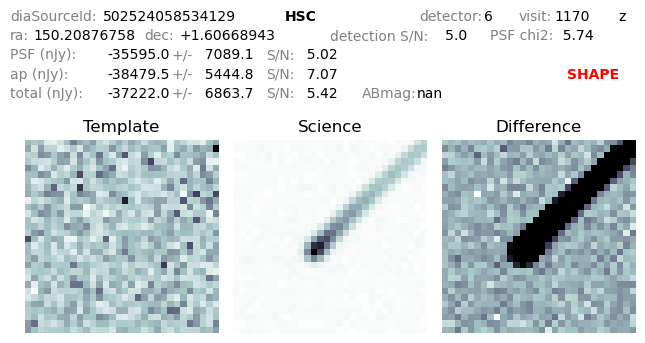

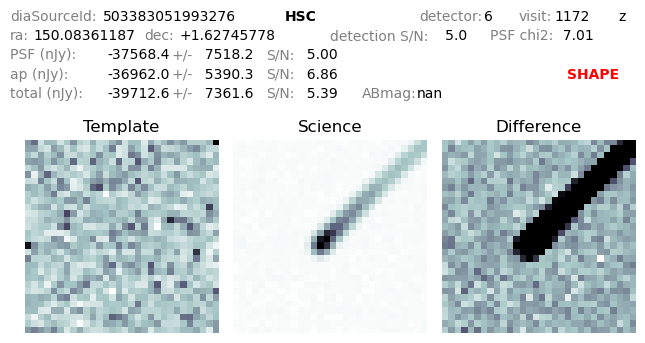

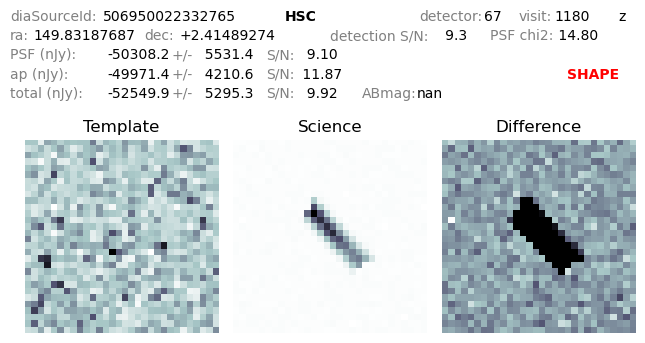

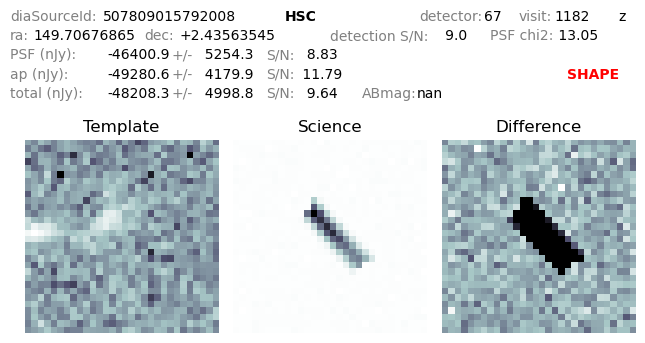

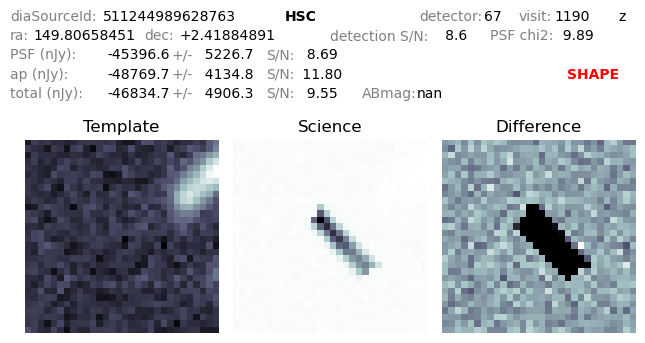

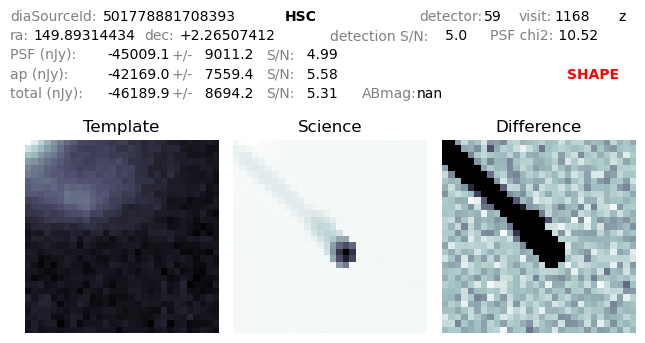

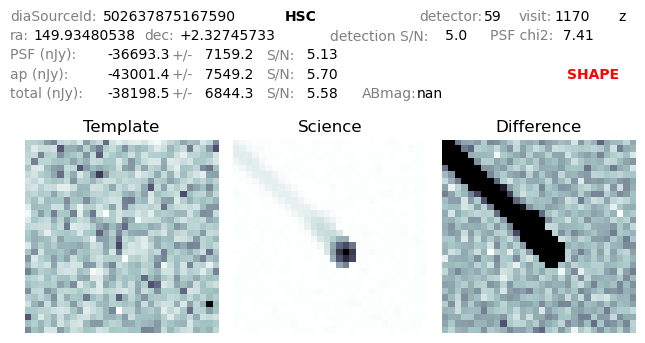

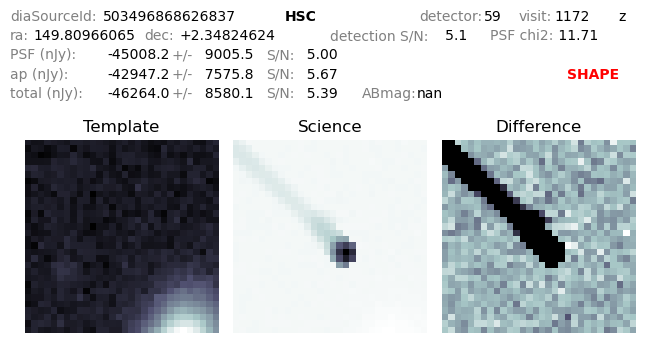

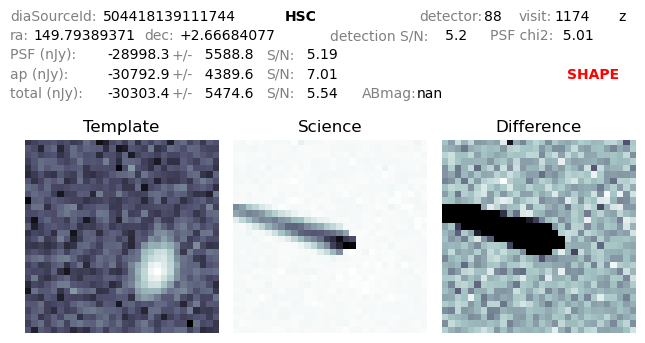

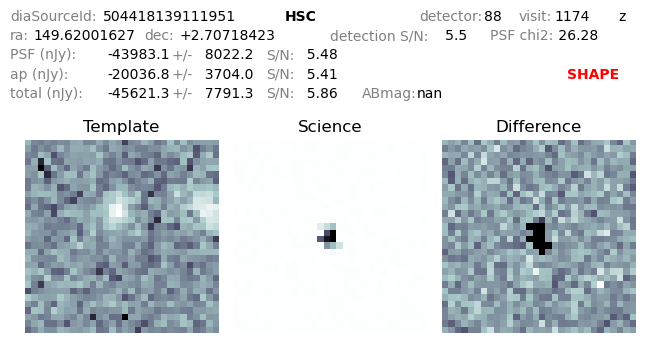

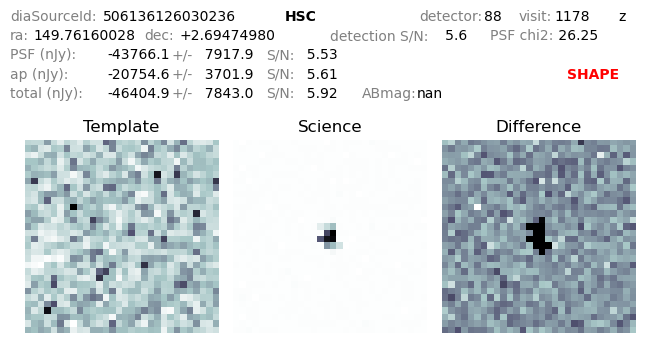

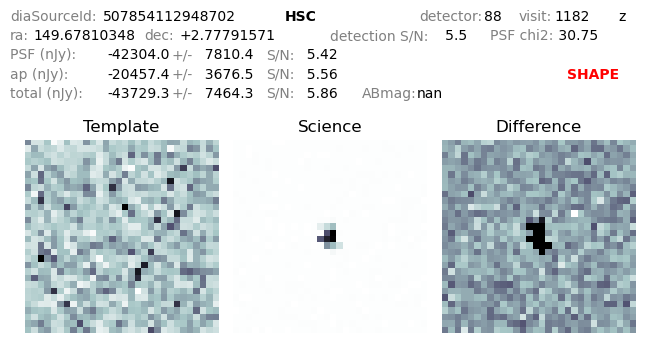

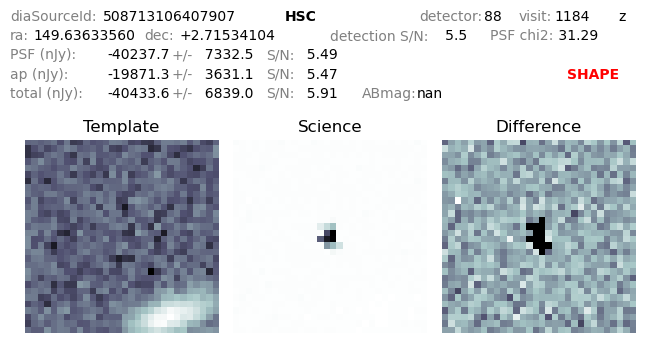

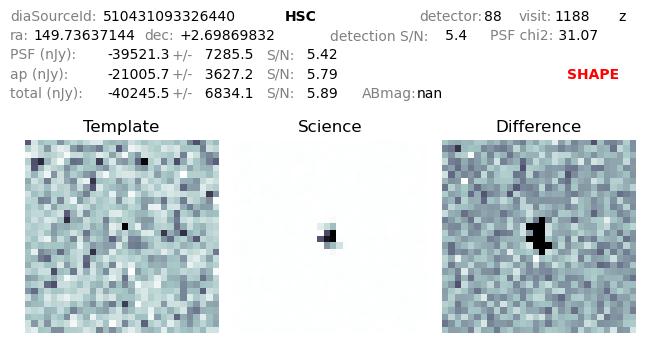

In [7]:
visit=[1170,1172,1180,1182,1190,1168,1170,1172,1174,1174,1178,1182,1184,1188]
detector= [6,6,67,67,67,59,59,59,88,88,88,88,88,88]
diaSourceId=[502524058534129, 503383051993276, 506950022332765, 507809015792008,
             511244989628763,501778881708393,502637875167590,503496868626837, 504418139111744,504418139111951,506136126030236,
            507854112948702,508713106407907,510431093326440]

for source in diaSourceId:
    single_path = path_manager(source)
    display(Image(single_path))

In [9]:
registry = butler.registry
dt = registry.getDatasetType('calexp')

afwDisplay.setDefaultBackend('firefly')
datasetType = 'calexp'
dataId ={'detector':detector[0],'visit': visit[0], 'skymap': 'hsc_rings_v1', 'instrument': 'HSC', 'band': 'i'}
datasetRefs = set(registry.queryDatasets(datasetType, dataId=dataId))
m_and_v_plots(datasetRefs, display_num=0)

Visit:  1170 , Detector:  6


0
...
